In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [387]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [388]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [389]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

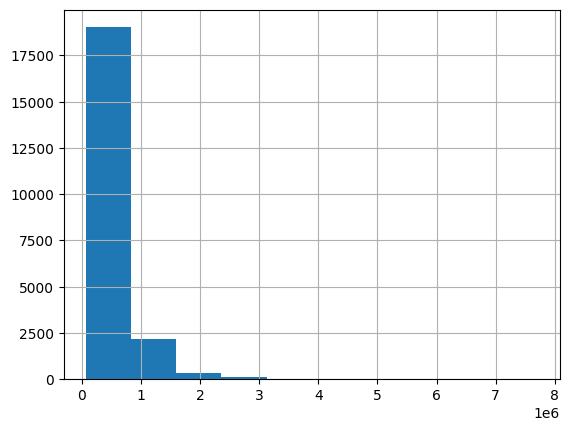

In [390]:
dataset.price.hist()

<Axes: >

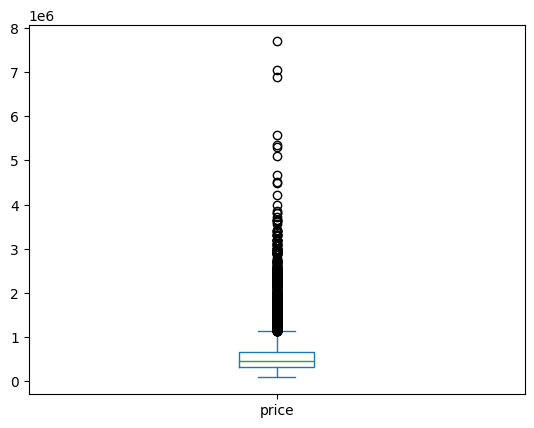

In [391]:
dataset.price.plot.box()

In [392]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = dataset[['sqft_living', 'sqft_lot']]
Y = dataset['price']

split =int(len(Y)*0.7)
train_data = X[:split]
test_data = X[split:]

train_labels = Y[:split]
test_labels = Y[split:]

model.fit(train_data, train_labels)

LinearRegression()

In [393]:
prediction = model.predict(test_data)

In [394]:
from sklearn.metrics import mean_squared_error
y_true = test_labels
y_pred = prediction
np.sqrt(mean_squared_error(y_true, y_pred))

262098.52054868586

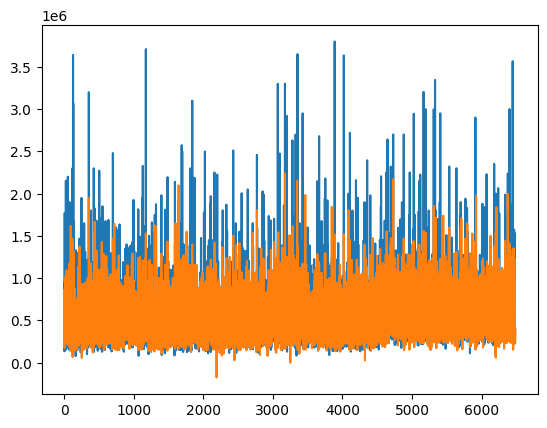

In [395]:

x= np.arange(len(test_labels))
y = test_labels
y_ = y_pred

plt.plot(x,y,x,y_)
plt.show()



In [396]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [397]:
model.coef_

array([ 2.86203326e+02, -2.82135111e-01])

In [398]:
model.intercept_

-49914.58355060627

# My Experiment

In [399]:
# load the data
# split the data
# create the model
# measure the performance

In [400]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [401]:
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder

# dataset['date'] = LabelEncoder().fit_transform(dataset['date'])


model = LinearRegression()

X = dataset[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
Y = dataset['price']

split =int(len(Y)*0.5)
train_data = X[:split]
test_data = X[split:]

train_labels = Y[:split]
test_labels = Y[split:]

model.fit(train_data, train_labels)

LinearRegression()

In [402]:
dataset.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [403]:
prediction = model.predict(test_data)

In [404]:
from sklearn.metrics import mean_squared_error
y_true = test_labels
y_pred = prediction
np.sqrt(mean_squared_error(y_true, y_pred))

199212.00072212817

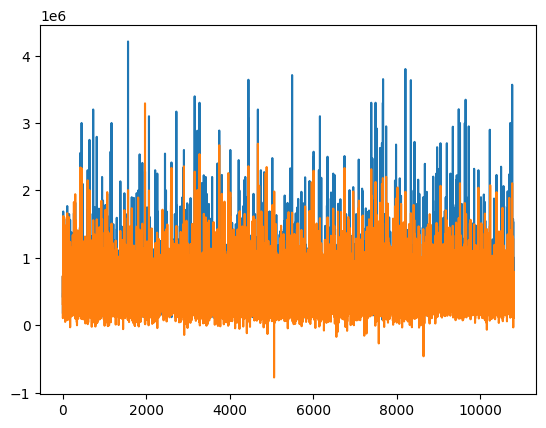

In [405]:
x= np.arange(len(test_labels))
y = test_labels
y_ = y_pred

plt.plot(x,y,x,y_)
plt.show()

In [406]:
ones = np.ones((len(train_labels),1))

In [407]:
X = train_data.to_numpy()
X = np.concatenate((ones, X), axis=1)

In [408]:
X.T

array([[ 1.00000e+00,  1.00000e+00,  1.00000e+00, ...,  1.00000e+00,
         1.00000e+00,  1.00000e+00],
       [ 1.18000e+03,  2.57000e+03,  7.70000e+02, ...,  1.30000e+03,
         3.12000e+03,  2.40000e+03],
       [ 5.65000e+03,  7.24200e+03,  1.00000e+04, ...,  5.78200e+03,
         7.68000e+03,  1.03640e+04],
       ...,
       [-1.22257e+02, -1.22319e+02, -1.22233e+02, ..., -1.21821e+02,
        -1.22390e+02, -1.21799e+02],
       [ 1.34000e+03,  1.69000e+03,  2.72000e+03, ...,  1.02000e+03,
         2.90000e+03,  2.39000e+03],
       [ 5.65000e+03,  7.63900e+03,  8.06200e+03, ...,  7.20000e+03,
         7.68000e+03,  9.91800e+03]])

In [409]:
temp = np.matmul(X.T,X) 

In [410]:
temp.shape

(19, 19)

In [411]:
from numpy.linalg import inv

temp = inv(temp)

In [412]:
temp = np.matmul(temp, X.T)

In [413]:
temp.shape

(19, 10806)

In [414]:
Y = train_labels
temp = np.matmul(temp, Y)

In [415]:
X = test_data.to_numpy()
X = np.concatenate((np.ones((len(test_labels),1)), X), axis=1)
prediction = np.matmul(X, temp)

y_true = test_labels
y_pred = prediction

loss = np.sqrt(mean_squared_error(y_true, y_pred))
print(loss)

1431178.2032376614


In [416]:
def gradient(prediction, label, data):
    error = prediction - label
    grad = np.matmul(error,data)
    return np.mean(grad)

In [417]:
weight = np.zeros((18,1))

In [418]:
lr = 0.01

In [419]:
X = train_data.to_numpy()

In [420]:
prediction = np.matmul(X, weight)

In [421]:
error = prediction[:1000] - train_labels.to_numpy()[:1000]

In [422]:
gradient = np.matmul(error, X[:1000])

In [423]:
gradient = np.mean(gradient,axis=0)

In [424]:
weight = weight - lr * gradient.reshape(-1,1)

In [425]:
prediction = np.matmul(X, weight)
error = prediction.astype(int)[:1000] - train_labels.to_numpy().astype(int)[:1000]
gradient = np.mean(np.matmul(error, X[:1000]),axis=0)
weight = weight - lr * gradient.reshape(-1,1)

C:\Users\norbe\AppData\Local\Temp\ipykernel_16392\2046889625.py:2: RuntimeWarning: invalid value encountered in cast
  error = prediction.astype(int)[:1000] - train_labels.to_numpy().astype(int)[:1000]


In [434]:
#ChatGPT
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming train_data and train_labels are already defined
X = train_data.to_numpy()
y = train_labels.to_numpy().reshape(-1, 1)  # Ensure y is a column vector

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X_scaled to account for the bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize weights
weights = np.zeros((X_b.shape[1], 1))
lr = 0.1  # Reduced learning rate
n_iterations = 1000
m = len(y)
predictions = np.dot(X_b, weights)
errors = predictions - y
gradients = 2/m * X_b.T.dot(errors)
print(gradient.shape)
weights -= lr * gradients

for iteration in range(n_iterations):
    predictions = np.dot(X_b, weights)
    errors = predictions - y
    gradients = 2/m * X_b.T.dot(errors)
    weights -= lr * gradients
    
    # Optional: Print RMSE every 100 iterations to monitor convergence
    if iteration % 100 == 0:
        rmse = np.sqrt(mean_squared_error(y, predictions))
        print(f"Iteration {iteration}: RMSE = {rmse}")

# Final RMSE
final_rmse = np.sqrt(mean_squared_error(y, np.dot(X_b, weights)))
print(f"Final RMSE: {final_rmse}")

(19, 1)
Iteration 0: RMSE = 493579.9976772145
Iteration 100: RMSE = 205140.6505148718
Iteration 200: RMSE = 205140.38297374896
Iteration 300: RMSE = 205140.38294632986
Iteration 400: RMSE = 205140.38294632564
Iteration 500: RMSE = 205140.38294632564
Iteration 600: RMSE = 205140.38294632564
Iteration 700: RMSE = 205140.38294632564
Iteration 800: RMSE = 205140.38294632564
Iteration 900: RMSE = 205140.38294632564
Final RMSE: 205140.38294632564


In [433]:
# bad ChatGPT
import numpy as np

# Assuming train_data and train_labels are defined and properly preprocessed
X = train_data.to_numpy()
y = train_labels.to_numpy().reshape(-1, 1)  # Ensure y is a column vector
m = len(y)

# Add a column of ones to X to account for the bias term in the linear model
X_b = np.c_[np.ones((m, 1)), X]  # Add intercept column

# Initialize weights
weight = np.zeros((X_b.shape[1], 1))
lr = 0.01
n_iterations = 1000  # Example number of iterations

for iteration in range(n_iterations):
    prediction = np.dot(X_b, weight)
    error = prediction - y
    gradient = 2/m * np.dot(X_b.T, error)
    weight -= lr * gradient
    print(f"Iteration {iteration}: MSE = {np.mean(error**2)}")

Iteration 0: MSE = 421491954291.2793
Iteration 1: MSE = 1.1759553200293994e+28
Iteration 2: MSE = 4.8783670952244935e+44
Iteration 3: MSE = 2.0240275553635096e+61
Iteration 4: MSE = 8.397716056689518e+77
Iteration 5: MSE = 3.4842241635608765e+94
Iteration 6: MSE = 1.4456095115595426e+111
Iteration 7: MSE = 5.997854223356309e+127
Iteration 8: MSE = 2.4885181647088726e+144
Iteration 9: MSE = 1.0324896913935617e+161
Iteration 10: MSE = 4.283814271288533e+177
Iteration 11: MSE = 1.777360574528038e+194
Iteration 12: MSE = 7.374294056255703e+210
Iteration 13: MSE = 3.0596049899761263e+227
Iteration 14: MSE = 1.2694344195219076e+244
Iteration 15: MSE = 5.266901285448272e+260
Iteration 16: MSE = 2.185244761293314e+277
Iteration 17: MSE = 9.066611291829906e+293
Iteration 18: MSE = inf
Iteration 19: MSE = inf
Iteration 20: MSE = inf
Iteration 21: MSE = inf
Iteration 22: MSE = inf
Iteration 23: MSE = inf
Iteration 24: MSE = inf
Iteration 25: MSE = inf
Iteration 26: MSE = inf
Iteration 27: MSE = i

C:\Users\norbe\AppData\Local\Temp\ipykernel_16392\514134305.py:21: RuntimeWarning: overflow encountered in square
  print(f"Iteration {iteration}: MSE = {np.mean(error**2)}")


Iteration 726: MSE = nan
Iteration 727: MSE = nan
Iteration 728: MSE = nan
Iteration 729: MSE = nan
Iteration 730: MSE = nan
Iteration 731: MSE = nan
Iteration 732: MSE = nan
Iteration 733: MSE = nan
Iteration 734: MSE = nan
Iteration 735: MSE = nan
Iteration 736: MSE = nan
Iteration 737: MSE = nan
Iteration 738: MSE = nan
Iteration 739: MSE = nan
Iteration 740: MSE = nan
Iteration 741: MSE = nan
Iteration 742: MSE = nan
Iteration 743: MSE = nan
Iteration 744: MSE = nan
Iteration 745: MSE = nan
Iteration 746: MSE = nan
Iteration 747: MSE = nan
Iteration 748: MSE = nan
Iteration 749: MSE = nan
Iteration 750: MSE = nan
Iteration 751: MSE = nan
Iteration 752: MSE = nan
Iteration 753: MSE = nan
Iteration 754: MSE = nan
Iteration 755: MSE = nan
Iteration 756: MSE = nan
Iteration 757: MSE = nan
Iteration 758: MSE = nan
Iteration 759: MSE = nan
Iteration 760: MSE = nan
Iteration 761: MSE = nan
Iteration 762: MSE = nan
Iteration 763: MSE = nan
Iteration 764: MSE = nan
Iteration 765: MSE = nan
